# Fall 2023 - Final Project - GF180 MPW Shuttle Submission

## Verilog - Part 1

<b>Lecture Date:</b> 11/29/2023

<b>Final Project Due (to Get on the Shuttle):</b> <font color="red"><b>12/11/23 at 6:00pm</b></font><br>
<b>Final Project Due (for course credit):</b> <font color="red"><b>12/14/23 at 6:00pm</b></font><br>

### Getting Started

<b>1) Open your PuTTY Terminal and Log into Cadence as normal</b>

    cd esc-courses/fa23-cse-30342.01/dropbox/
    tcsh
    source cadence_nd.sh
    cd VLSI

<b>2) Create a Verilog Folder</b> instead of going into VLSI

    mkdir Verilog
    cd Verilog

<b>3) Test the success of your startup</b>

    which irun
    /escnfs/home/csesoft/cadence/installs/INCISIVE152/tools.lnx86/bin/irun

### (Re-)introduction to Verilog

A digital system can be represented at different levels of abstraction. This approach keeps the description and design of complex systems manageable.

There are three important paradigms for modeling using Hardware Description Languages
<ul>
    <li><b>Behavioral Modeling</b> – Explicit definition of mathematical relationship between the input and output with no implementation information</li>
    <li><b>Structural Modeling</b> – Implicit definition of I/O relationship through a particular structure using interconnection of components</li>
    <li><b>Physical Modeling</b> - Deals with how the system is laid out in the physical space.</li>
</ul>

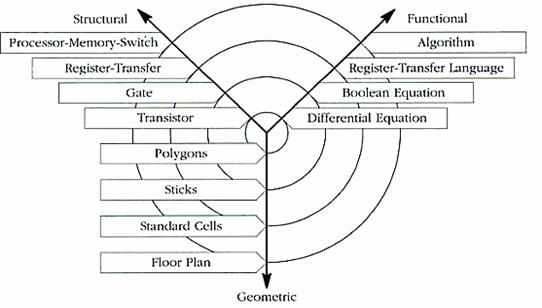

<b>Verilog</b> is a hardware description language (HDL) used to model electronic systems. It is most commonly used in the design and verification of digital circuits at the register-transfer level of abstraction.
<ul><li>The <a href = "https://ieeexplore-ieee-org.proxy.library.nd.edu/document/5985443">IEEE 1364 Standard</a></li></ul>

Verilog is short for <b><font color = "red">Veri</font>fying <font color = "blue">Log</font>ic</b>.

> <b>A quick side quest</b> - The primary competing HDL is VHDL. VHDL was developed at the behest of the Department of Defense in order to document the behavior of the ASICs that supplier companies were including in equipment. VHDL is an acronym-within-an-acroynm. 

#### Objective:

The invertor of Verilog, <a href = "https://en.wikipedia.org/wiki/Phil_Moorby">Phil Moorby</a>, wanted a language with syntax similar to the C programming language. VHDL is based on the ADA programming language, which is why the syntax can be more difficult to grasp for introductory programmers.

Like C, Verilog is case-sensitive and has a basic preprocessor (C uses <code>#include</code> as preprocessing).

### Logic Synthesis

Synthesis converts Verilog (or other HDL) descriptions to a logic mapping by using technology-specific primitives:
<ul>
    <li><b>For FPGA</b>: LUTs, flip-flops, and BRAMs</li>
    <li><b>For ASICs</b>: standard cells and memory macros</li>
</ul>

In addition, synthesis algorithms optimize the implementation for delay (performance) and power.

> Also known in industry as <b>PPA</b>: <font color = "red">P</font>ower, <font color = "red">P</font>erformance, and <font color = "red">A</font>rea

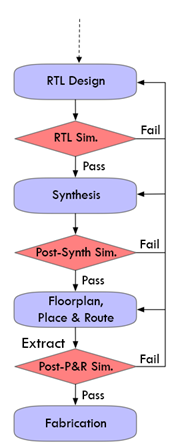

### Modules

Verilog design consists of a hierarchy of <i>modules</i>. A module is the basic building block of Verilog. Consider the following visual example:

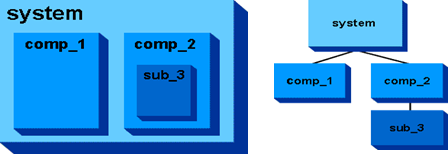

There are four modules: 
<ul>
    <li>system</li><li>comp_1</li><li>comp_2</li><li>sub_3</li>
</ul>

System is the parent of comp_1 and comp_2, and comp_2 is the parent of sub_3. comp_1 and comp_2 are the children of system, and sub_3 is the child of comp_2.

> <b>Note</b>: A module is not a function in the C sense.  There is no call and return mechanism.  Think of it more like a hierarchical data structure. The <b>Testbench</b> is typically the top-level module

### Components

Modules, in turn, are made of different types of components. These include:
•	Parameters (parameter identifier = expression;)<br>
•	Nets<br>
•	Registers<br>
•	Primitives and Instances<br>
•	Continuous Assignments<br>
•	Procedural Blocks<br>
•	Task/Function definitions<br>


### Hello, World in Verilog

    module main;
    initial
        begin
            $display("Hello world!");
        $finish; 
        end
    endmodule

In your Terminal, create a file <code>helloworld.v</code>, and then run the following command:

    irun helloworld.v
    
The tool indicates how many modules and blocks you created.

### Building Verilog Modules

A module <b>instantiation</b> contains a name, ports (if necessary), the implementation and endmodule.

<b>Ports</b>: Verilog modules have 3 types of ports: 
<ul>
    <li><code>input</code></li>
    <li><code>output</code></li>
    <li><code>inout</code></li>
</ul>
    
Inout are bidirectional.

#### Examples

    module foo(in1, in2, out1, out2, bid1); 

        input in1, in2;
        output out1, out2; 
        inout bid1;
        . . .
        
    endmodule

Not all modules require ports:

    module toplevel;
        wire source1, source2; wire sink1, sink2; 
        wire bus;
        foo f0(source1, source2, sink1, sink2, bus);
        ...
    endmodule

<b>Recall from Logic Design</b>: What is wrong with the following module definition? 

    module A (p1, p2, , p4);
    
        input p1, p2; 
        output p4;
        ...
        
    endmodule

<font color = "white">Solution: There are not allowed to be any missing ports</font>

### Working Together: Write a Module and Testbench for a 2-input NAND Gate

Review Verilog code for a 2-input nand gate. including stimuli and a testbench, for all inputs

    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec37/nand2.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec37/nand2_stim.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec37/nand2_driver.v

#### Supply and ground in Verilog

    supply1 vdd; // supply1 is the Vdd 
    supply0 gnd; // supply0 is ground 

#### Writing nmos and pmos transistors in Verilog

Format: 

    gate_type individual_gate_name(inputs..., outputs...);
    
Examples:

    nmos n0(Y, net_2, A);
    pmos p1(Y, vdd, A); 

### Stimulation and Test Bench Files

> Into <code>nand2_stim.v</code>

    /**********************************************
    *	Module name: NAND2_Stim
    *	Pre-Conditions: none
    *	Post-Conditions: A, B
    *	
    *	This function generates binary values to
    *	stimulate the 2-input NAND gate
    *********************************************/ 
    module nand2_Stim(output A, B); 
    
        parameter delay = 100;

        // Used for creating two-input binary test 
        reg [1:0] cnt;

        initial begin
            cnt = 0;
            // repeat (3) means do the function 3 times
            // Similar: for(i=0; i < 4; i++) 
            repeat (3) begin
                #delay cnt=cnt+1;
            end
        end

        // Automaticaly convert 'cnt' this to binary
        // 0 -> A = '0', B = '0'
        // 1 -> A = '0', B = '1'... and so on. 
        assign {A,B} = cnt;
        
    endmodule

---------------------

> Into <code>nand2_driver.v</code>

    /**********************************************
    *	Module name: nand_Driver
    *	Pre-Conditions: none
    *	Post-Conditions: none

    *	
    *	This is the main driver function for generating
    *	stimulus and simulating the NAND gate.
    *********************************************/ 

    module nand2_Driver;

        wire A, B, Y;

        // Generate the Stimulus 
        nand2_Stim stim(A,B);

        // Test the circuit using the stimulus 
        nand2 n0(A,B,Y);

        initial begin
            // Will print the values out at the bottom of the Simulation
            $monitor ("@ time=%d A=%b, B=%b, Y=%d", $time, A, B, Y);
        end 

    endmodule

### irun simulation and result

    $ irun nand2.v nand2_stim.v nand2_driver.v
    ncsim> source /escnfs/home/csesoft/cadence/installs/INCISIVE152/tools/inca/files/ncsimrc
    ncsim> run
    @ time=                   0 A=0, B=0, Y=1
    @ time=                 100 A=0, B=1, Y=1
    @ time=                 200 A=1, B=0, Y=1
    @ time=                 300 A=1, B=1, Y=0
    ncsim: *W,RNQUIE: Simulation is complete.

### Review: Thought Question

Code a 2-input AND operation using (i) wire and (ii) reg

Solution for Wire:

<code><font color="white">wire y = a&b;</font></code>
    
Solution for Reg:

<code><font color="white">always @* y = a&b;</font></code>

### Working Together: Lab 3 Logic

Recall from Lab 3 the circuit you designed: 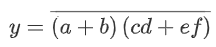

Here is an example drawing and solution

> Recall different solutions based on different Euler paths!

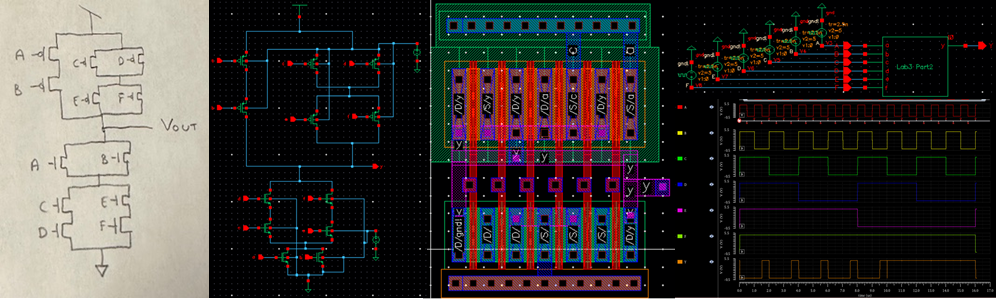

Now, we will design this same circuit in Verilog. Here are the three names:

    lab3.v lab3_stim.v lab3_driver.v
    
Once we design the circuit, we run the command:

    irun lab3.v lab3_stim.v lab3_driver.v
    
> Note: The simulation appears <i>backwards</i> because we are counting up from 0 to 63, whereas in the SPICE simulation, we went from 63 to 0.

How do we make them match? <b>Count Down</b>

    initial begin
        cnt = 63;
        // repeat (64) means do the function 64 times
        // Similar: for(i=63; i >= 0; i--) 
		repeat (64) begin
			#delay cnt=cnt-1;
        end
    end
    
You will now see the numbers match our simulation!

### Visualization

You can use the irun GUI utility <b>SimVision</b>. We've encountered SimVision before in your simulation of the ALU.

Run the following command:

    irun -access +r -gui lab3.v lab3_driver.v lab3_stim.v
    
When SimVision opens, right click on:

    lab3_driver

We will perform the same steps that we did last time! For 

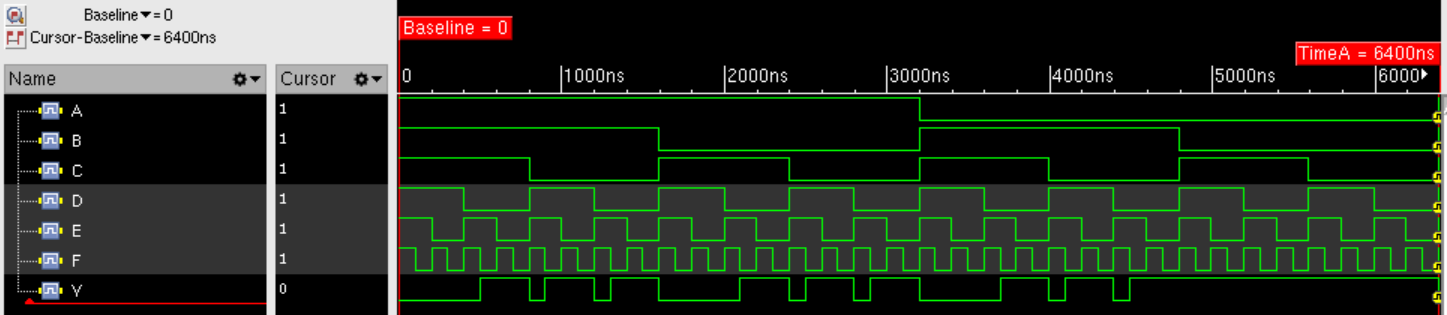